In [1]:
#libraries for data analysis
import pandas as pd
import numpy as np
#libraries for normality tests
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [2]:
#import the User Datasets
xls = pd.ExcelFile('Browser_Sessions.xlsx')
Chrome = pd.read_excel(xls, 'Chrome')
Safari = pd.read_excel(xls, 'Safari')
Firefox = pd.read_excel(xls, 'Firefox')
Edge = pd.read_excel(xls, 'Edge')
Samsung = pd.read_excel(xls, 'Samsung Internet')
Ie = pd.read_excel(xls, 'Internet Explorer')

In [3]:
#Remove the dates for ease
Chrome = Chrome['Sessions']
Safari = Safari['Sessions']
Firefox = Firefox['Sessions']
Edge = Edge['Sessions']
Samsung = Samsung['Sessions']
Ie = Ie['Sessions']

In [4]:
#convert datasets into arrays
Chrome = Chrome.values
Safari = Safari.values
Firefox = Firefox.values
Edge = Edge.values
Samsung = Samsung.values
Ie = Ie.values

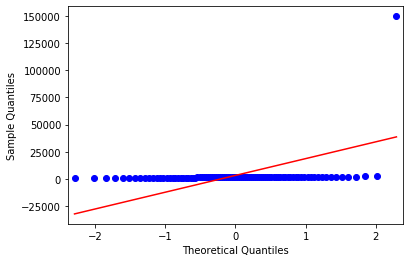

In [5]:
#plot both datasets using qqplot to check for normality
qqplot(Chrome, line='s')
pyplot.show()

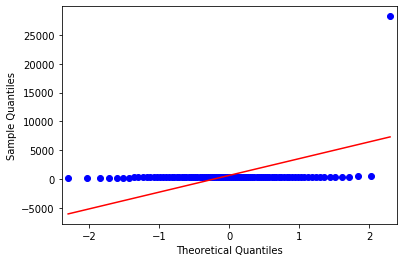

In [6]:
qqplot(Safari, line='s')
pyplot.show()

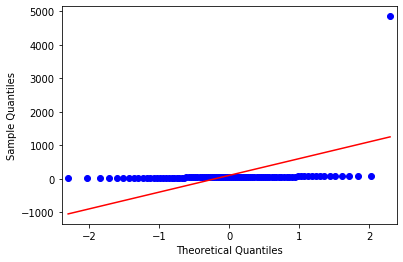

In [7]:
qqplot(Firefox, line='s')
pyplot.show()

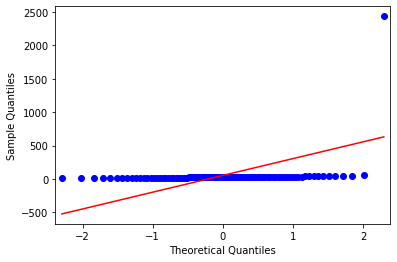

In [8]:
qqplot(Edge, line='s')
pyplot.show()

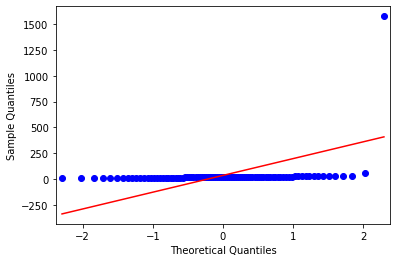

In [9]:
qqplot(Samsung, line='s')
pyplot.show()

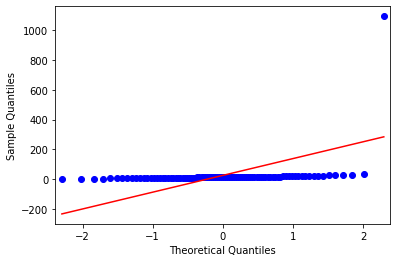

In [10]:
qqplot(Ie, line='s')
pyplot.show()

### Not all datasets look normal since they fall off the qq plot

In [11]:
names = ["Chrome", "Safari", "Firefox", "Edge", "Samsung", "Ie"]
for index, i in enumerate((Chrome, Safari, Firefox, Edge, Samsung, Ie)):
    stat, p = shapiro(i)
    print(names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Chrome
Statistics=0.096, p=0.000
Sample does not look Gaussian (reject H0)
Safari
Statistics=0.090, p=0.000
Sample does not look Gaussian (reject H0)
Firefox
Statistics=0.102, p=0.000
Sample does not look Gaussian (reject H0)
Edge
Statistics=0.099, p=0.000
Sample does not look Gaussian (reject H0)
Samsung
Statistics=0.101, p=0.000
Sample does not look Gaussian (reject H0)
Ie
Statistics=0.110, p=0.000
Sample does not look Gaussian (reject H0)


### Since not all datasets are normaly distributed non-parametric tests should be used.

In [12]:
#import Kruskal–Wallis test: Non parametric method for testing whether samples originate from the same distribution. 
#Kruskal-Wallis can accommodate more than two groups, extending Wilcoxon-Mann-Whitney.
from scipy.stats import kruskal

In [13]:
stat, p = kruskal(Chrome, Safari, Firefox, Edge, Samsung, Ie)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:    
    print('The difference between the datasets is not significant (fail to reject H0)')
else:
    print('The difference between the datasets is significant (reject H0)')

Statistics=474.797, p=0.000
The difference between the datasets is significant (reject H0)


### We conclude that there is significant difference between the datasets

### Further investigation can be made using the Wilcoxon-Mann-Whitney (WMW) rank sum test in each pair of the datasets

In [14]:
#import ranksums (Wilcoxon-Mann-Whitney (WMW) rank sum test) to test wether the difference between the two datasets is significant
from scipy.stats import ranksums

### Chrome against every other browser

In [15]:
#Chrome against every other browser
names = ["Safari", "Firefox", "Edge", "Samsung", "Ie"]
for index, i in enumerate(( Safari, Firefox, Edge, Samsung, Ie)):
    stat, p = ranksums(Chrome,i)
    print('Chrome -',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

Chrome - Safari
Statistics=11.398, p=0.000
The difference between the two datasets is significant (reject H0)
Chrome - Firefox
Statistics=11.398, p=0.000
The difference between the two datasets is significant (reject H0)
Chrome - Edge
Statistics=11.404, p=0.000
The difference between the two datasets is significant (reject H0)
Chrome - Samsung
Statistics=11.556, p=0.000
The difference between the two datasets is significant (reject H0)
Chrome - Ie
Statistics=11.612, p=0.000
The difference between the two datasets is significant (reject H0)


### Safari against every other browser

In [16]:
#Safari against every other browser
names = ["Firefox", "Edge", "Samsung", "Ie"]
for index, i in enumerate((Firefox, Edge, Samsung, Ie)):
    stat, p = ranksums(Safari,i)
    print('Safari -',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

Safari - Firefox
Statistics=11.398, p=0.000
The difference between the two datasets is significant (reject H0)
Safari - Edge
Statistics=11.398, p=0.000
The difference between the two datasets is significant (reject H0)
Safari - Samsung
Statistics=11.398, p=0.000
The difference between the two datasets is significant (reject H0)
Safari - Ie
Statistics=11.398, p=0.000
The difference between the two datasets is significant (reject H0)


### Firefox against Edge, Samsung and Internet Explorer

In [17]:
#Firefox against every other browser
names = ["Edge", "Samsung", "Ie"]
for index, i in enumerate((Edge, Samsung, Ie)):
    stat, p = ranksums(Firefox,i)
    print('Firefox -',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

Firefox - Edge
Statistics=9.112, p=0.000
The difference between the two datasets is significant (reject H0)
Firefox - Samsung
Statistics=10.883, p=0.000
The difference between the two datasets is significant (reject H0)
Firefox - Ie
Statistics=11.215, p=0.000
The difference between the two datasets is significant (reject H0)


### Edge against Samsung and Internet Explorer

In [18]:
#Edge against every other browser
names = ["Samsung", "Ie"]
for index, i in enumerate((Samsung, Ie)):
    stat, p = ranksums(Edge,i)
    print('Edge -',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

Edge - Samsung
Statistics=7.807, p=0.000
The difference between the two datasets is significant (reject H0)
Edge - Ie
Statistics=9.901, p=0.000
The difference between the two datasets is significant (reject H0)


### Samsung against Internet Explorer 

In [19]:
#Samsung against Internet explorer
stat, p = ranksums(Samsung, Ie)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The difference between the two datasets is not significant (fail to reject H0)')
else:
    print('The difference between the two datasets is significant (reject H0)')

Statistics=5.901, p=0.000
The difference between the two datasets is significant (reject H0)
